In [21]:
import numpy as np
import math 
import pandas as pd
from pandas.io.json import json_normalize
import json
import sys  
sys.path.insert(0, './scripts')
from PricingModels import *

cols = ["apy","time_stretch","x_reserves","y_reserves","amount","apy_after_slippage","slippage"]
data=[]
for APY in np.arange(1, 51, 1):
    time_stretch = Element_Pricing_Model.calc_time_stretch(APY)
    days_until_maturity = 90
    t = days_until_maturity/(365*time_stretch)
    T = days_until_maturity/365
    g = .1
    y_reserves = 1
    x_reserves = Element_Pricing_Model.calc_x_reserves(APY,y_reserves,days_until_maturity,time_stretch)
    total_supply=x_reserves+y_reserves
    max_trade = Element_Pricing_Model.calc_max_trade(y_reserves+total_supply,x_reserves,t)-.0001
    for amount in np.arange(max_trade, max_trade/100, -max_trade/100):
        (without_fee_or_slippage,with_fee,without_fee,fee) = Element_Pricing_Model.calc_out_given_in(amount,y_reserves+total_supply,x_reserves,"base",g,t)
        APY_slippage = Element_Pricing_Model.apy(without_fee/amount,days_until_maturity)
        slippage = APY_slippage/APY
        data.append([APY,time_stretch,x_reserves,y_reserves,amount/max_trade,APY_slippage,slippage])
        
df = pd.DataFrame(data,columns=cols)
df

#print("reserves: " + str((x_reserves,y_reserves)))
#print("without_fee_or_slippage: " + str(without_fee_or_slippage))
#print("price: " + str(with_fee))
#print("max_trade: " + str(max_trade))
#print("check apy: " + str(Element_Pricing_Model.apy(without_fee/amount,days_until_maturity)))




,apy,time_stretch,x_reserves,y_reserves,amount,apy_after_slippage,slippage
0,1,110.93439,0.98207,1,1.00000,2.03271,2.03271
1,1,110.93439,0.98207,1,0.99000,1.99039,1.99039
2,1,110.93439,0.98207,1,0.98000,1.95938,1.95938
3,1,110.93439,0.98207,1,0.97000,1.93254,1.93254
4,1,110.93439,0.98207,1,0.96000,1.90832,1.90832
...,...,...,...,...,...,...,...
4954,50,2.21869,0.88216,1,0.06000,51.85205,1.03704
4955,50,2.21869,0.88216,1,0.05000,51.54091,1.03082
4956,50,2.21869,0.88216,1,0.04000,51.23079,1.02462
4957,50,2.21869,0.88216,1,0.03000,50.92165,1.01843


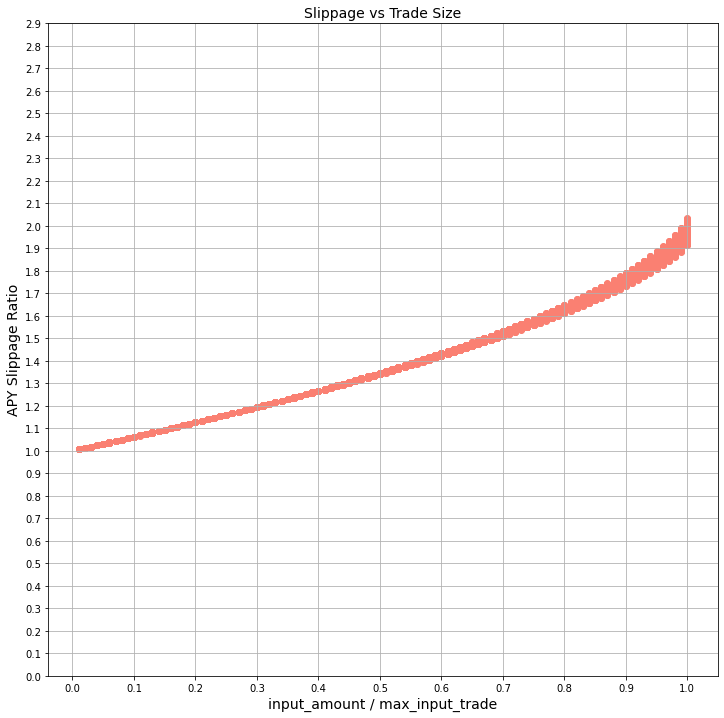

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

plt.subplots(figsize=(12,12))

df_filtered = df#[(df['amount']<=0.5)]
plt.scatter(df_filtered['amount'], df_filtered['slippage'], color='salmon',label= df_filtered['apy'].iloc[0])

plt.title('Slippage vs Trade Size', fontsize=14)
plt.xlabel('input_amount / max_input_trade', fontsize=14)
plt.ylabel('APY Slippage Ratio', fontsize=14)
plt.grid(True)
plt.yticks(np.arange(0,3, .1))
plt.xticks(np.arange(0,1.1, .1))


plt.show()

In [23]:
from scipy.optimize import curve_fit

def objective(x,a,b):
    return a*x + b

data = df.values
x = df[df['amount']<=0.5]['amount']
y = df[df['amount']<=0.5]['slippage']
# curve fit
popt, _ = curve_fit(objective, x, y)
# summarize the parameter values
a, b = popt
print('y = %.5f * x + %.5f' % (a, b))

y = 0.68583 * x + 0.99201


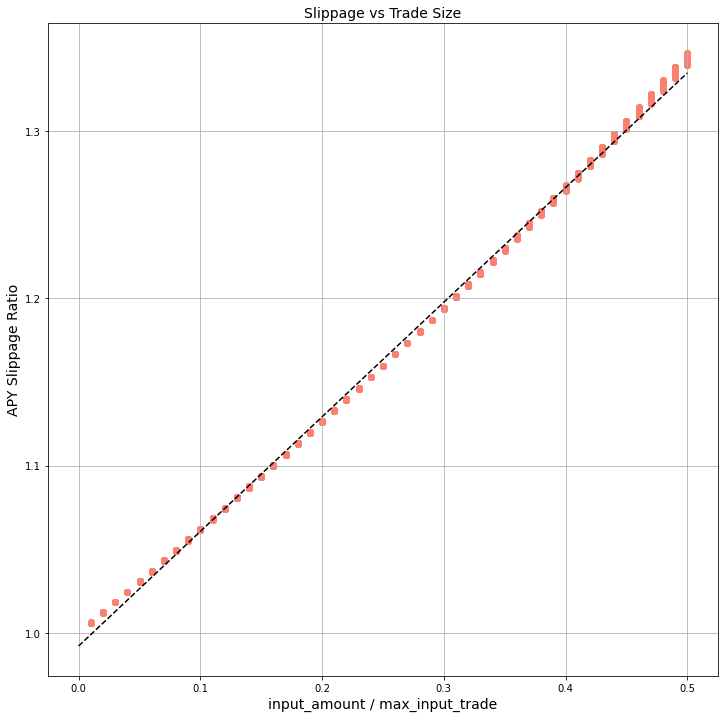

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

plt.subplots(figsize=(12,12))

df_filtered = df[(df['amount']<=0.5)]
plt.scatter(df_filtered['amount'], df_filtered['slippage'], color='salmon',label= df_filtered['apy'].iloc[0])

plt.title('Slippage vs Trade Size', fontsize=14)
plt.xlabel('input_amount / max_input_trade', fontsize=14)
plt.ylabel('APY Slippage Ratio', fontsize=14)
plt.grid(True)
plt.yticks(np.arange(0,3, .1))
plt.xticks(np.arange(0,.6, .1))

x = np.arange(0,.6,.1)
y = 0.68583 * x + 0.99201
plt.plot(x, y, '--', color="black")

plt.show()

In [184]:
import numpy as np
import math 
import pandas as pd
from pandas.io.json import json_normalize
import json
import sys  
sys.path.insert(0, './scripts')
from PricingModels import *

cols = ["apy","time_stretch","x_reserves","y_reserves","amount_in","amount_out","spot_price","actual_price","apy_after_slippage","slippage"]
data=[]
for APY in np.arange(1, 51, 1):
    time_stretch = Element_Pricing_Model.calc_time_stretch(APY)
    days_until_maturity = 180
    t = days_until_maturity/(365*time_stretch)
    T = days_until_maturity/365
    g = .1
    y_reserves = 1
    x_reserves = Element_Pricing_Model.calc_x_reserves(APY,y_reserves,days_until_maturity,time_stretch)
    total_supply=x_reserves+y_reserves
    max_trade = Element_Pricing_Model.calc_max_trade(y_reserves+total_supply,x_reserves,t)-.0001
    for amount in np.arange(max_trade, max_trade/50, -max_trade/50):
    #amount = max_trade
        (without_fee_or_slippage,with_fee,without_fee,fee) = Element_Pricing_Model.calc_out_given_in(amount,y_reserves+total_supply,x_reserves,"base",g,t)
        APY_slippage = Element_Pricing_Model.apy(without_fee/amount,days_until_maturity)
        spot_price=Element_Pricing_Model.calc_spot_price(x_reserves,y_reserves,total_supply,t)
        slippage = (spot_price-(without_fee/amount))/spot_price#APY_slippage/APY
        data.append([APY,time_stretch,x_reserves,y_reserves,amount/max_trade,without_fee,spot_price,without_fee/amount,APY_slippage,slippage])
        
df = pd.DataFrame(data,columns=cols)
#pd.set_option('display.max_rows', None)
pd.reset_option('display.max_rows')
df

#print("reserves: " + str((x_reserves,y_reserves)))
#print("without_fee_or_slippage: " + str(without_fee_or_slippage))
#print("price: " + str(with_fee))
#print("max_trade: " + str(max_trade))
#print("check apy: " + str(Element_Pricing_Model.apy(without_fee/amount,days_until_maturity)))



,apy,time_stretch,x_reserves,y_reserves,amount_in,amount_out,spot_price,actual_price,apy_after_slippage,slippage
0,1,110.934385,0.980055,1,1.00,0.979960,0.995068,0.989988,2.030286,0.005106
1,1,110.934385,0.980055,1,0.98,0.960709,0.995068,0.990347,1.957479,0.004745
2,1,110.934385,0.980055,1,0.96,0.941341,0.995068,0.990597,1.906684,0.004493
3,1,110.934385,0.980055,1,0.94,0.921927,0.995068,0.990809,1.863666,0.004280
4,1,110.934385,0.980055,1,0.92,0.902483,0.995068,0.990998,1.825428,0.004091
...,...,...,...,...,...,...,...,...,...,...
2450,50,2.218688,0.776892,1,0.12,0.122613,0.753425,0.734715,53.793841,0.024832
2451,50,2.218688,0.776892,1,0.10,0.102614,0.753425,0.737854,53.157414,0.020667
2452,50,2.218688,0.776892,1,0.08,0.082439,0.753425,0.740983,52.522827,0.016513
2453,50,2.218688,0.776892,1,0.06,0.062090,0.753425,0.744104,51.889932,0.012370


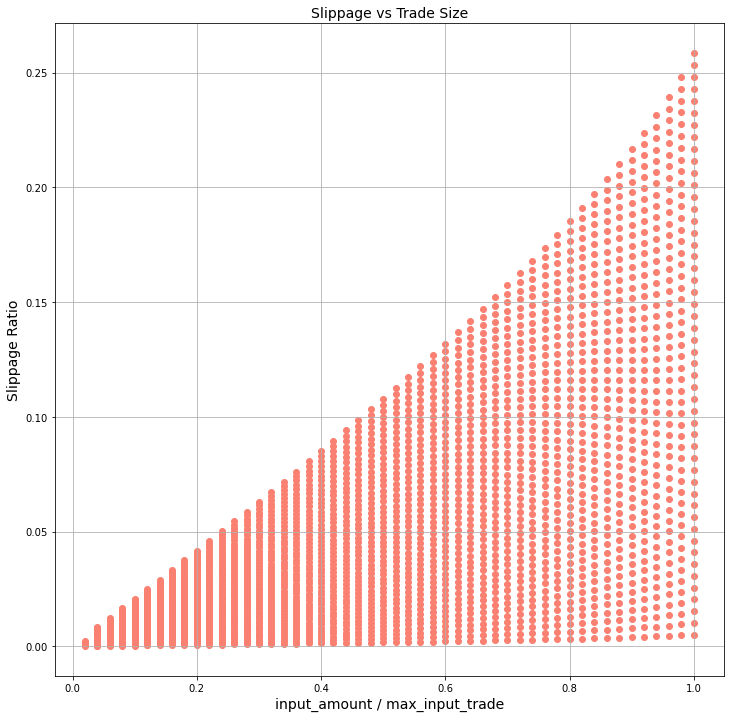

In [185]:
import pandas as pd
import matplotlib.pyplot as plt

plt.subplots(figsize=(12,12))

df_filtered = df#[(df['amount']<=0.5)]
plt.scatter(df_filtered['amount_in'], df_filtered['slippage'], color='salmon',label= df_filtered['apy'].iloc[0])

plt.title('Slippage vs Trade Size', fontsize=14)
plt.xlabel('input_amount / max_input_trade', fontsize=14)
plt.ylabel('Slippage Ratio', fontsize=14)
plt.grid(True)
#plt.yticks(np.arange(0,3, .1))
#plt.xticks(np.arange(0,1.1, .1))

#hypotenus is at apy 50
#base is at apy 1 
#height is max_trade at different apys

plt.show()

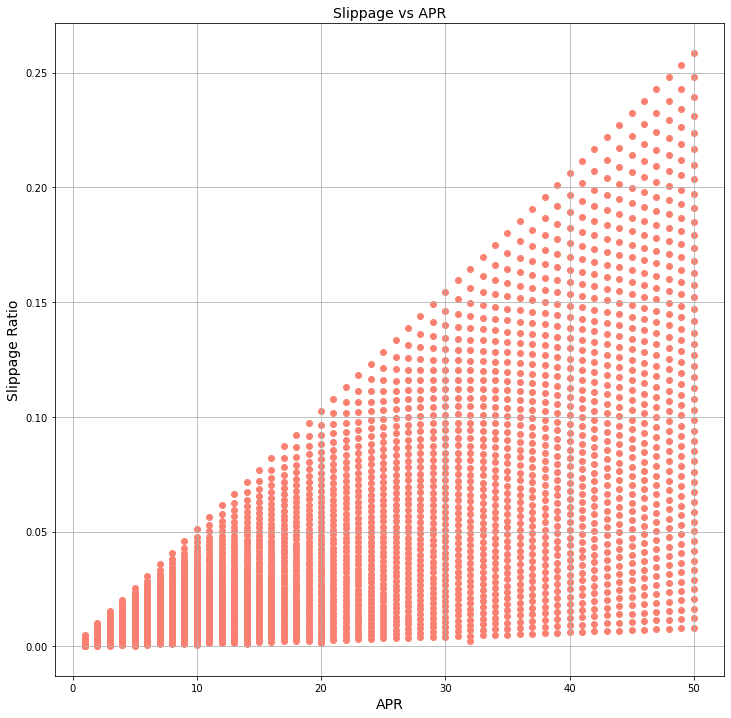

In [187]:
import pandas as pd
import matplotlib.pyplot as plt

plt.subplots(figsize=(12,12))

df_filtered = df#[(df['amount']<=0.5)]
plt.scatter(df_filtered['apy'], df_filtered['slippage'], color='salmon',label= df_filtered['apy'].iloc[0])

#df_filtered = df[(df['time_stretch']==3) & (df['tranche_length']==30)]
#label=(df_filtered['time_stretch'].iloc[0],df_filtered['tranche_length'].iloc[0])


plt.title('Slippage vs APR', fontsize=14)
plt.xlabel('APR', fontsize=14)
plt.ylabel('Slippage Ratio', fontsize=14)
plt.grid(True)
#plt.yticks(np.arange(0,3, .1))
#plt.xticks(np.arange(0,1.1, .1))

#hypotenus is when it is the max trade
#base is when it is the max_trade/50
#height is APY = 50 at different trade sizes

plt.show()